<a href="https://colab.research.google.com/github/Ristoll/AIS_Labs/blob/main/LR_9_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

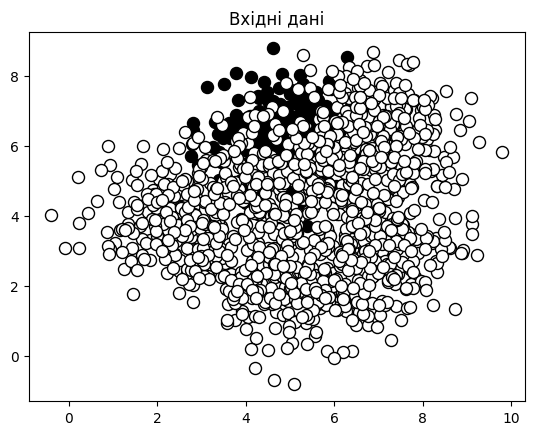

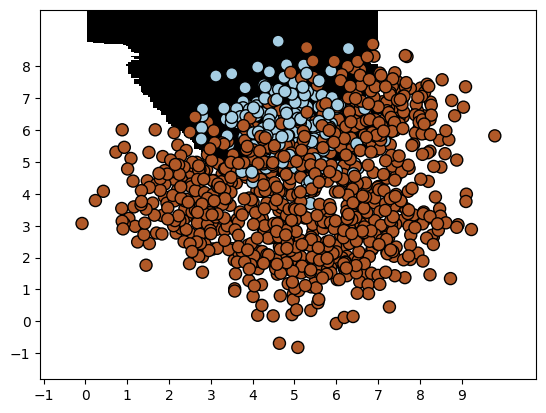

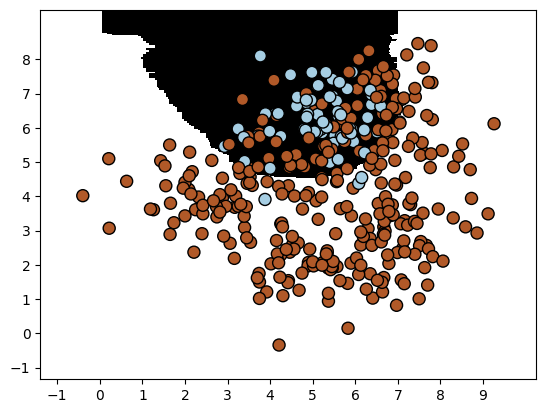


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.44      0.93      0.60       181
     Class-1       0.98      0.77      0.86       944

    accuracy                           0.80      1125
   macro avg       0.71      0.85      0.73      1125
weighted avg       0.89      0.80      0.82      1125

########################################


Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.45      0.94      0.61        69
     Class-1       0.98      0.74      0.84       306

    accuracy                           0.78       375
   macro avg       0.72      0.84      0.73       375
weighted avg       0.88      0.78      0.80       375

########################################



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from utilities import visualize_classifier

# Завантаження даних
input_file = 'data_imbalance.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Розбиття на класи
class_0 = X[y == 0]
class_1 = X[y == 1]

plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', edgecolors='black', linewidth=1, marker='o')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='o')
plt.title('Вхідні дані')

# Розбиття на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# Параметри класифікатора з балансуванням класів
params = {
    'n_estimators': 100,
    'max_depth': 4,
    'random_state': 0,
    'class_weight': 'balanced'   # <-- додано балансування
}

# Створення та навчання класифікатора
classifier = ExtraTreesClassifier(**params)
classifier.fit(X_train, y_train)

# Візуалізація результатів
visualize_classifier(classifier, X_train, y_train)  # Навчальний набір
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test)    # Тестовий набір

# Виведення звітів
class_names = ['Class-0', 'Class-1']
print("\n" + "#" * 40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#" * 40 + "\n")
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#" * 40 + "\n")

plt.show()



In [ ]:
from google.colab import files

uploaded = files.upload()

Saving data_imbalance.txt to data_imbalance.txt
